In [22]:
import csv
file = open('data/accident_age1.csv', 'r', encoding='utf-8')

data = csv.reader(file)

for row in data : 
    print(row)

file.close()

['가해자연령층', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']
['20세이하', '285', '4', '79', '273', '34']
['20세이하', '315', '4', '95', '301', '48']
['20세이하', '415', '2', '115', '411', '54']
['20세이하', '484', '8', '137', '464', '75']
['20세이하', '579', '5', '157', '520', '100']
['20세이하', '580', '8', '157', '460', '113']
['20세이하', '534', '5', '163', '445', '79']
['20세이하', '552', '1', '167', '482', '96']
['20세이하', '547', '9', '155', '466', '114']
['20세이하', '557', '8', '162', '472', '89']
['20세이하', '403', '3', '118', '392', '56']
['20세이하', '340', '3', '82', '326', '66']
['21-30세', '1904', '23', '456', '2166', '185']
['21-30세', '1716', '21', '436', '1940', '183']
['21-30세', '2078', '24', '510', '2392', '174']
['21-30세', '2128', '22', '588', '2398', '223']
['21-30세', '2175', '14', '574', '2486', '199']
['21-30세', '2133', '26', '577', '2335', '259']
['21-30세', '2097', '23', '510', '2319', '227']
['21-30세', '2216', '38', '600', '2540', '227']
['21-30세', '2254', '19', '609', '2481', '271']
['21-30세', '2056', '

In [59]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('data/accident_age1.csv', encoding='utf-8')

# 각 나이대별로 그룹화하고, 합산할 컬럼들에 대해 합계 계산
grouped_by_age = df.groupby('가해자연령층').sum()

# 인덱스('가해자연령층')를 없애고 출력
grouped_by_age = grouped_by_age.reset_index()

# '61-64세'와 '65세이상' 데이터를 필터링합니다.
age_61_64 = grouped_by_age[grouped_by_age['가해자연령층'] == '61-64세']
age_65_plus = grouped_by_age[grouped_by_age['가해자연령층'] == '65세이상']

# 두 데이터프레임을 결합하기 위해 공통된 컬럼만 선택합니다.
common_columns = ['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']

# 두 데이터프레임의 값을 합칩니다.
age_61_plus = age_61_64.copy()
for col in common_columns:
    age_61_plus[col] += age_65_plus[col].values

# 새로운 데이터프레임을 만듭니다.
age_61_plus['가해자연령층'] = '61세이상'

# 기존 데이터프레임에서 '61-64세'와 '65세이상'을 삭제합니다.
grouped_by_age = grouped_by_age[~grouped_by_age['가해자연령층'].isin(['61-64세', '65세이상'])]

# 새로운 데이터프레임을 기존 데이터에 추가합니다.
final_df = pd.concat([grouped_by_age, age_61_plus], ignore_index=True)

# 결과 출력
print(final_df)


   가해자연령층   사고건수  사망자수   중상자수   경상자수  부상신고자수
0   20세이하   5591    60   1587   5012     924
1  21-30세  24975   296   6490  28055    2580
2  31-40세  27669   260   7100  30566    2684
3  41-50세  33428   357   8921  35913    3185
4  51-60세  44322   585  11975  47192    3873
5   61세이상  59660   993  16636  62945    5211


In [27]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('data/accident_age1.csv', encoding='utf-8')

# 각 나이대별로 그룹화하고, 합산할 컬럼들에 대해 합계 계산
grouped = df.groupby('가해자연령층').sum()

# 인덱스('가해자연령층')를 없애고 출력
grouped = grouped.reset_index()

# 전체 사고건수 합계 계산
total_accidents = grouped['사고건수'].sum()

# 각 연령층의 사고건수 비율 계산
grouped['사고건수_비율'] = (grouped['사고건수'] / total_accidents) * 100

# 결과 출력
print(grouped)

   가해자연령층   사고건수  사망자수   중상자수   경상자수  부상신고자수    사고건수_비율
0   20세이하   5591    60   1587   5012     924   2.857727
1  21-30세  24975   296   6490  28055    2580  12.765468
2  31-40세  27669   260   7100  30566    2684  14.142452
3  41-50세  33428   357   8921  35913    3185  17.086049
4  51-60세  44322   585  11975  47192    3873  22.654297
5  61-64세  20046   248   5492  21538    1695  10.246109
6   65세이상  39614   745  11144  41407    3516  20.247898


27949.285714285714


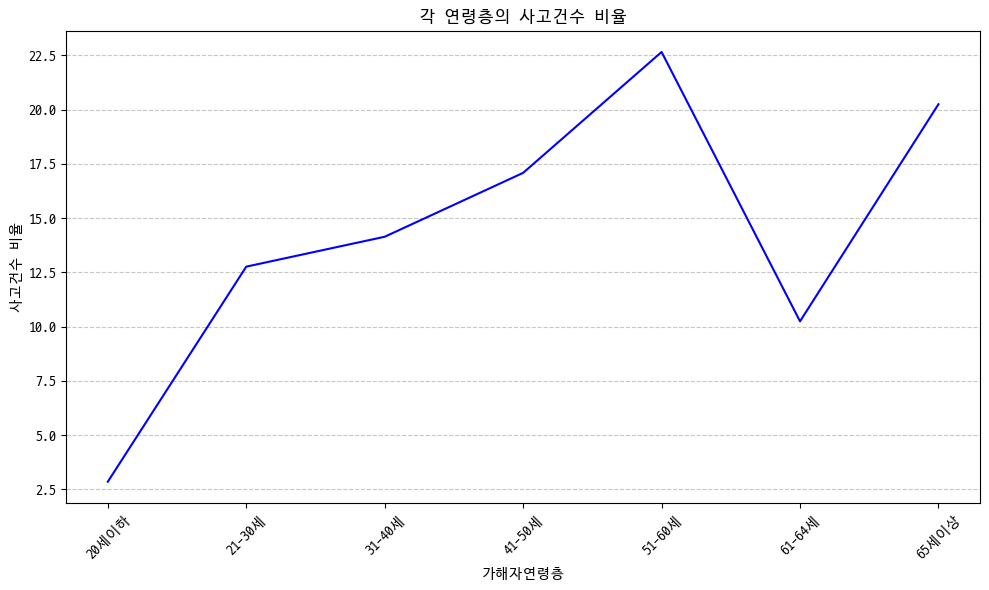

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('data/accident_age1.csv', encoding='utf-8')

# 각 나이대별로 그룹화하고, 합산할 컬럼들에 대해 합계 계산
grouped = df.groupby('가해자연령층').sum()

# 인덱스('가해자연령층')를 없애고 출력
grouped = grouped.reset_index()

# 전체 사고건수 합계 계산
total_accidents = grouped['사고건수'].sum()

# 전 연령층의 평균 사고건수 계산
mean_accidents = total_accidents / 7
print(mean_accidents)

# 각 연령층의 사고건수 비율 계산
grouped['사고건수_비율'] = (grouped['사고건수'] / total_accidents) * 100

# 막대 그래프 그리기
plt.rcParams['font.family'] ='D2Coding'
plt.figure(figsize=(10, 6))
plt.plot(grouped['가해자연령층'], grouped['사고건수_비율'], color='blue')
plt.xlabel('가해자연령층')
plt.ylabel('사고건수 비율')
plt.title('각 연령층의 사고건수 비율')
plt.xticks(rotation=45)  # X축 라벨을 45도 회전시켜 읽기 쉽게
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축에 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('data/accident_age1.csv', encoding='utf-8')

# 각 나이대별로 그룹화하고, 합산할 컬럼들에 대해 합계 계산
grouped = df.groupby('가해자연령층').sum()

# 인덱스('가해자연령층')를 없애고 출력
grouped = grouped.reset_index()

# 전체 사고건수 합계 계산
total_accidents = grouped['사고건수'].sum()

In [29]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('data/accident_age1.csv', encoding='utf-8')

# 각 나이대별로 그룹화하고, 합산할 컬럼들에 대해 합계 계산
grouped = df.groupby('가해자연령층').sum()

# 인덱스('가해자연령층')를 없애고 출력
grouped = grouped.reset_index()

# 사망자수, 중상자수, 경상자수를 사고건수로 나눈 후 100을 곱해 비율 계산
grouped['사망자수_비율'] = (grouped['사망자수'] / grouped['사고건수']) * 100
grouped['중상자수_비율'] = (grouped['중상자수'] / grouped['사고건수']) * 100
grouped['경상자수_비율'] = (grouped['경상자수'] / grouped['사고건수']) * 100
grouped['부상신고자수_비율'] = (grouped['부상신고자수'] / grouped['사고건수']) * 100

# 결과 출력
print(grouped[['가해자연령층', '사고건수', '사망자수_비율', '중상자수_비율', '경상자수_비율', '부상신고자수_비율']])


   가해자연령층   사고건수   사망자수_비율    중상자수_비율     경상자수_비율  부상신고자수_비율
0   20세이하   5591  1.073153  28.384904   89.644071  16.526561
1  21-30세  24975  1.185185  25.985986  112.332332  10.330330
2  31-40세  27669  0.939680  25.660486  110.470201   9.700387
3  41-50세  33428  1.067967  26.687208  107.433888   9.527941
4  51-60세  44322  1.319886  27.018185  106.475340   8.738324
5  61-64세  20046  1.237155  27.396987  107.442881   8.455552
6   65세이상  39614  1.880648  28.131469  104.526178   8.875650


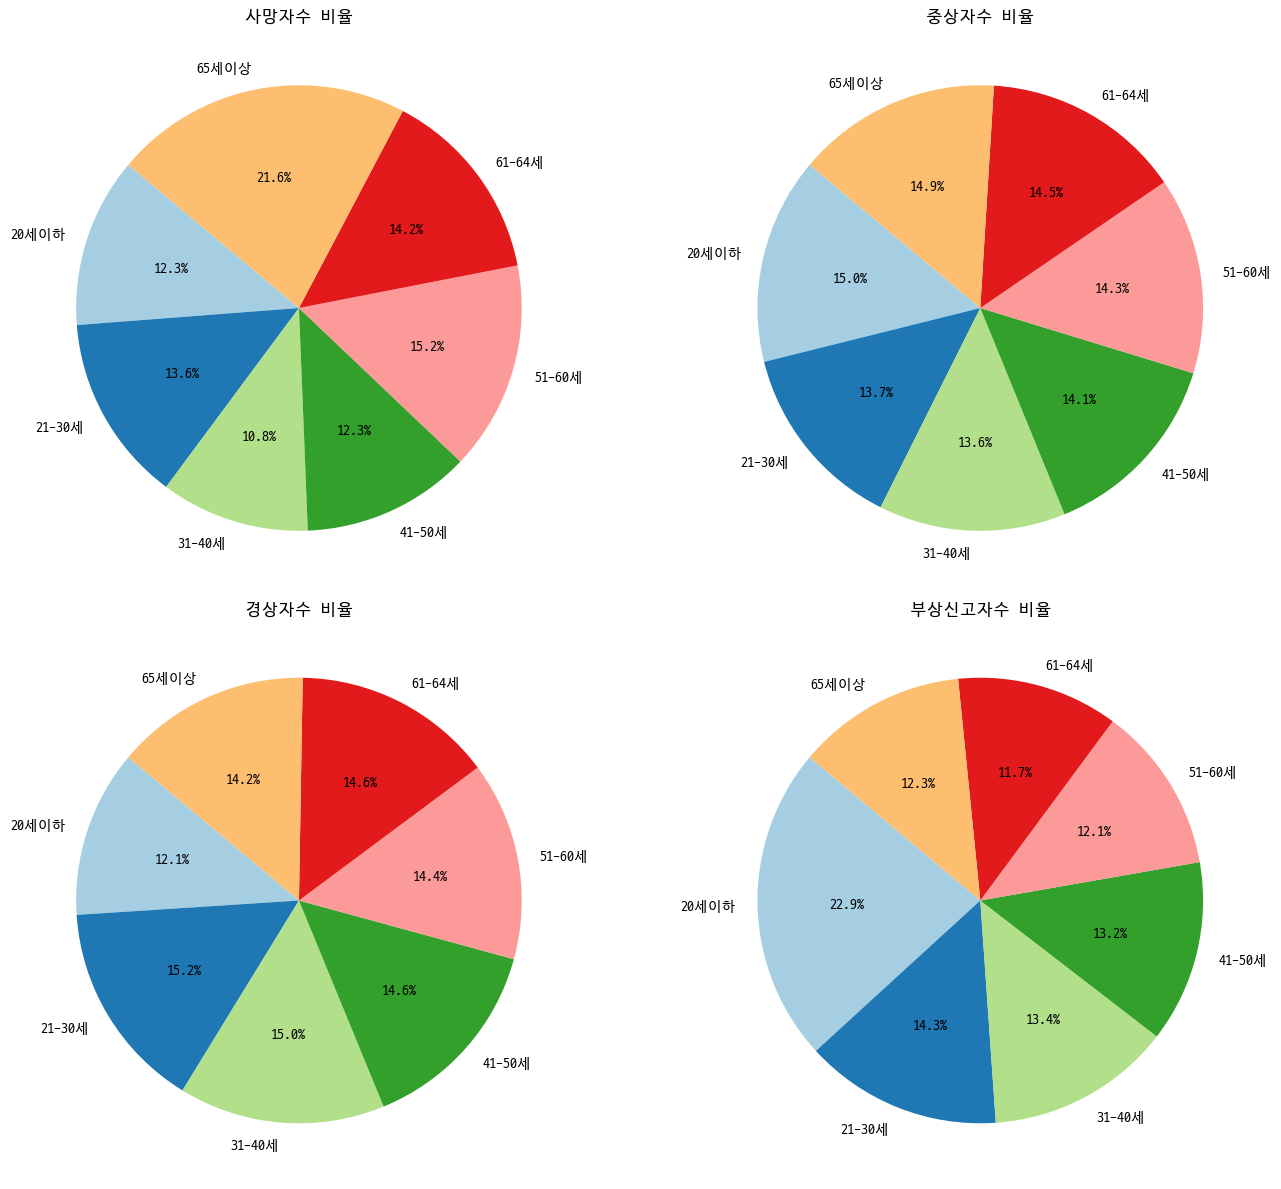

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('data/accident_age1.csv', encoding='utf-8')

# 각 나이대별로 그룹화하고, 합산할 컬럼들에 대해 합계 계산
grouped = df.groupby('가해자연령층').sum()

# 인덱스('가해자연령층')를 없애고 출력
grouped = grouped.reset_index()

# 사망자수, 중상자수, 경상자수를 사고건수로 나눈 후 100을 곱해 비율 계산
grouped['사망자수_비율'] = (grouped['사망자수'] / grouped['사고건수']) * 100
grouped['중상자수_비율'] = (grouped['중상자수'] / grouped['사고건수']) * 100
grouped['경상자수_비율'] = (grouped['경상자수'] / grouped['사고건수']) * 100
grouped['부상신고자수_비율'] = (grouped['부상신고자수'] / grouped['사고건수']) * 100

# 원 차트 그리기
plt.rcParams['font.family'] = 'D2Coding'  # 한글 폰트 설정
fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 서브플롯 생성

# 각 비율을 원 차트로 그리기
labels = grouped['가해자연령층']

# 사망자수 비율 원 차트
axs[0, 0].pie(grouped['사망자수_비율'], labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(grouped))))
axs[0, 0].set_title('사망자수 비율')

# 중상자수 비율 원 차트
axs[0, 1].pie(grouped['중상자수_비율'], labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(grouped))))
axs[0, 1].set_title('중상자수 비율')

# 경상자수 비율 원 차트
axs[1, 0].pie(grouped['경상자수_비율'], labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(grouped))))
axs[1, 0].set_title('경상자수 비율')

# 부상신고자수 비율 원 차트
axs[1, 1].pie(grouped['부상신고자수_비율'], labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(grouped))))
axs[1, 1].set_title('부상신고자수 비율')

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [61]:
import csv
file = open('data/licence_age.csv', 'r', encoding='utf-8')

data = csv.reader(file)

for row in data : 
    print(row)

file.close()

['연령대별(1)', '소계']
['계', '34133763']
['16세', '1887']
['17세', '4299']
['18세', '57189']
['19세', '208793']
['20세', '264166']
['21세', '338938']
['22세', '418965']
['23세', '433535']
['24세', '472820']
['25세', '520639']
['26세', '551456']
['27세', '587777']
['28세', '608485']
['29세', '620436']
['30세', '643431']
['31세', '633679']
['32세', '589883']
['33세', '588027']
['34세', '589092']
['35세', '585741']
['36세', '595975']
['37세', '617125']
['38세', '626144']
['39세', '705631']
['40세', '772943']
['41세', '786894']
['42세', '782727']
['43세', '774573']
['44세', '674994']
['45세', '723051']
['46세', '706784']
['47세', '726738']
['48세', '784731']
['49세', '811077']
['50세', '809800']
['51세', '847168']
['52세', '819148']
['53세', '814713']
['54세', '807626']
['55세', '741802']
['56세', '695837']
['57세', '716480']
['58세', '693512']
['59세', '653137']
['60세', '708128']
['61세', '714086']
['62세', '705584']
['63세', '638212']
['64세', '572544']
['65세', '552339']
['66세', '483145']
['67세', '481369']
['68세', '394290']
['69세', '327484

In [73]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('data/licence_age.csv', encoding='utf-8')

# '연령대별(1)' 컬럼을 인덱스로 설정하고 '소계' 컬럼만 선택
df.set_index('연령대별(1)', inplace=True)
df = df[['소계']]

# '계'와 같은 값을 제외합니다.
df = df[~df.index.str.contains('계')]

# 데이터프레임의 인덱스를 정수형으로 변환
# '세이상'을 '99'로 변환한 후, '세'를 제거하고, 마지막으로 '이상'을 제거
def convert_age_index(index):
    index = index.replace('세이상', '99')
    index = index.replace('세', '')
    index = index.replace('이상', '')
    return index

df.index = df.index.map(convert_age_index)

# 이제 문자열을 정수형으로 변환합니다.
df.index = df.index.astype(int)

# 연령대별로 그룹화하고 합산하기
age_ranges = {
    '20세 이하': df.loc[df.index <= 20].sum(),
    '21-30세': df.loc[(df.index >= 21) & (df.index <= 30)].sum(),
    '31-40세': df.loc[(df.index >= 31) & (df.index <= 40)].sum(),
    '41-50세': df.loc[(df.index >= 41) & (df.index <= 50)].sum(),
    '51-60세': df.loc[(df.index >= 51) & (df.index <= 60)].sum(),
    '61세 이상': df.loc[df.index >= 61].sum()
}

# 새로운 데이터프레임 생성
combined_df = pd.DataFrame(age_ranges).T

# '소계' 컬럼 이름을 '면허소지자수'로 변경
combined_df.rename(columns={'소계': '면허소지자수'}, inplace=True)

# 인덱스를 기본 숫자 인덱스로 재설정
combined_df.reset_index(drop=True, inplace=True)

# 컬럼 이름 설정
combined_df.columns.name = None

# 결과 출력
print(combined_df)


    면허소지자수
0   536334
1  5196482
2  6304240
3  7581369
4  7497551
5  7017784


   가해자연령층   사고건수  사망자수   중상자수   경상자수  부상신고자수   면허소지자수
0   20세이하   5591    60   1587   5012     924   536334
1  21-30세  24975   296   6490  28055    2580  5196482
2  31-40세  27669   260   7100  30566    2684  6304240
3  41-50세  33428   357   8921  35913    3185  7581369
4  51-60세  44322   585  11975  47192    3873  7497551
5   61세이상  59660   993  16636  62945    5211  7017784
20세 이하의 사고건수비율:
1.0424474301461402
61세 이상의 사고건수비율:
nan


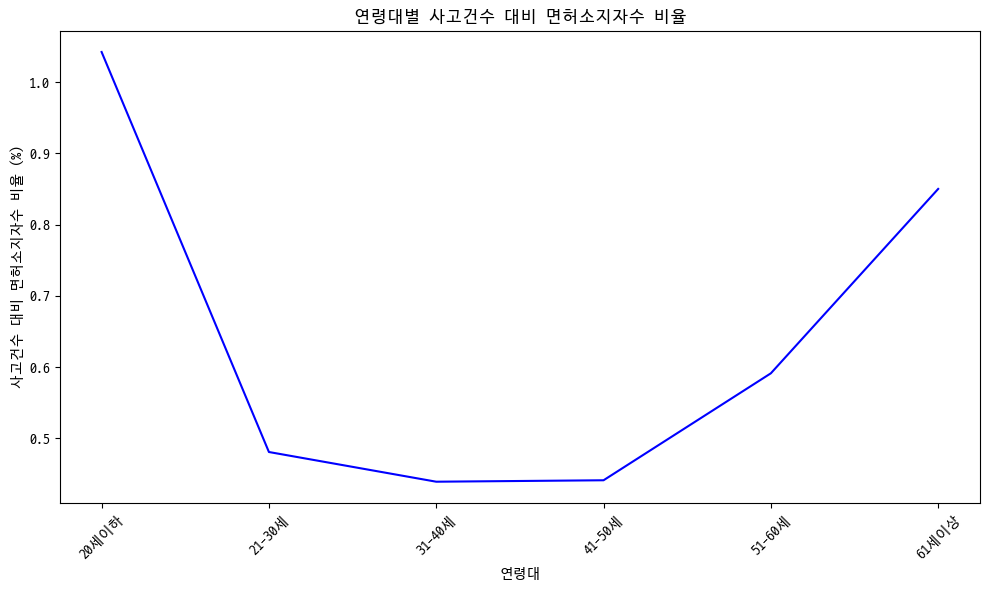

In [102]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('data/licence_age.csv', encoding='utf-8')

# '연령대별(1)' 컬럼을 인덱스로 설정하고 '소계' 컬럼만 선택
df.set_index('연령대별(1)', inplace=True)
df = df[['소계']]

# '계'와 같은 값을 제외합니다.
df = df[~df.index.str.contains('계')]

# 데이터프레임의 인덱스를 정수형으로 변환
def convert_age_index(index):
    index = index.replace('세이상', '99')
    index = index.replace('세', '')
    index = index.replace('이상', '')
    return index

df.index = df.index.map(convert_age_index)
df.index = df.index.astype(int)

# 연령대별로 그룹화하고 합산하기
age_ranges = {
    '20세 이하': df.loc[df.index <= 20].sum(),
    '21-30세': df.loc[(df.index >= 21) & (df.index <= 30)].sum(),
    '31-40세': df.loc[(df.index >= 31) & (df.index <= 40)].sum(),
    '41-50세': df.loc[(df.index >= 41) & (df.index <= 50)].sum(),
    '51-60세': df.loc[(df.index >= 51) & (df.index <= 60)].sum(),
    '61세 이상': df.loc[df.index >= 61].sum()
}
combined_df = pd.DataFrame(age_ranges).T
combined_df.rename(columns={'소계': '면허소지자수'}, inplace=True)
combined_df.reset_index(drop=True, inplace=True)
combined_df.columns.name = None

# 사고 데이터프레임 읽기
df_accidents = pd.read_csv('data/accident_age1.csv', encoding='utf-8')

# 각 나이대별로 그룹화하고, 합산할 컬럼들에 대해 합계 계산
grouped_by_age = df_accidents.groupby('가해자연령층').sum()
grouped_by_age = grouped_by_age.reset_index()

# '61-64세'와 '65세이상' 데이터를 필터링합니다.
age_61_64 = grouped_by_age[grouped_by_age['가해자연령층'] == '61-64세']
age_65_plus = grouped_by_age[grouped_by_age['가해자연령층'] == '65세이상']

# 두 데이터프레임의 값을 합칩니다.
common_columns = ['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']
age_61_plus = age_61_64.copy()
for col in common_columns:
    age_61_plus[col] += age_65_plus[col].values

age_61_plus['가해자연령층'] = '61세이상'
grouped_by_age = grouped_by_age[~grouped_by_age['가해자연령층'].isin(['61-64세', '65세이상'])]
final_df = pd.concat([grouped_by_age, age_61_plus], ignore_index=True)

# 두 데이터프레임을 가로로 결합
final_combined_df = pd.concat([final_df, combined_df], axis=1)

# 결과 출력
print(final_combined_df)


# 비율 계산: 사고건수 / 면허소지자수
final_combined_df['사고건수 대비 면허소지자수 비율'] = final_combined_df['사고건수'] / final_combined_df['면허소지자수'] * 100

# 20세 이하의 사고건수만 추출하여 출력
accidents_20_and_under = final_combined_df.loc[final_combined_df['가해자연령층'] == '20세이하', '사고건수'] / final_combined_df['면허소지자수'] * 100
accidents_61_plus = final_combined_df.loc[final_combined_df['가해자연령층'] == '61세이상', '사고건수'] / final_combined_df['면허소지자수'] * 100
print("20세 이하의 사고건수비율:")
print(accidents_20_and_under.values[0])
print("61세 이상의 사고건수비율:")
print(accidents_61_plus.values[0])


# 그래프를 그리기 위해 필요한 컬럼만 선택
plot_df = final_combined_df[['가해자연령층', '사고건수 대비 면허소지자수 비율']]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(plot_df['가해자연령층'], plot_df['사고건수 대비 면허소지자수 비율'], color='blue')
# plt.bar(plot_df['가해자연령층'], plot_df['사고건수 대비 면허소지자수 비율'], color='skyblue')
plt.xlabel('연령대')
plt.ylabel('사고건수 대비 면허소지자수 비율 (%)')
plt.title('연령대별 사고건수 대비 면허소지자수 비율')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()


20세 이하에서 사고가 많은 이유는 초보운전자들이 미숙하기 떄문에 사고율이 높고
고령으로 갈 수록 사고율이 증가하는 양상을 볼 수 있다. 고령 운전자들은 반응속도가 느리기 때문에 그런 것으로 볼 수 있다.

In [87]:
# 20세 이하의 사고건수만 추출하여 출력
accidents_20_and_under = final_combined_df.loc[final_combined_df['가해자연령층'] == '20세 이하', '사고건수']

print("20세 이하의 사고건수:")
print(accidents_20_and_under.values[0])

20세 이하의 사고건수:


IndexError: index 0 is out of bounds for axis 0 with size 0